In [2]:
import pandas as pd

In [7]:
import numpy as np
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [8]:
rng = np.random.RandomState(0)

X, y = make_classification(n_samples=700, random_state=rng)

In [9]:
clf = RandomForestClassifier(n_estimators=10, random_state=rng)

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rsh = HalvingRandomSearchCV(estimator=clf, param_distributions=param_dist,
                            factor=2, random_state=rng)
rsh.fit(X, y)
rsh.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 10}

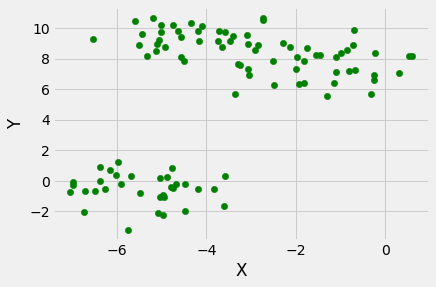

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt 
from matplotlib import style
  
style.use("fivethirtyeight")
  
X, y = make_blobs(n_samples = 100, centers = 3, 
               cluster_std = 1, n_features = 2)
  
plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'g')
plt.xlabel("X")
plt.ylabel("Y")
  
plt.show()
plt.clf()